In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
from fastai.vision import *

In [ ]:
from PIL import Image as PImage
import cv2
import imageio

In [ ]:
path=Path('/content/drive/My Drive/Dataset GTZAN/Data/images_original')

In [ ]:
path.ls()

[PosixPath('/content/drive/My Drive/Dataset GTZAN/Data/images_original/reggae'),
 PosixPath('/content/drive/My Drive/Dataset GTZAN/Data/images_original/pop'),
 PosixPath('/content/drive/My Drive/Dataset GTZAN/Data/images_original/jazz'),
 PosixPath('/content/drive/My Drive/Dataset GTZAN/Data/images_original/rock'),
 PosixPath('/content/drive/My Drive/Dataset GTZAN/Data/images_original/disco'),
 PosixPath('/content/drive/My Drive/Dataset GTZAN/Data/images_original/hiphop'),
 PosixPath('/content/drive/My Drive/Dataset GTZAN/Data/images_original/classical'),
 PosixPath('/content/drive/My Drive/Dataset GTZAN/Data/images_original/country'),
 PosixPath('/content/drive/My Drive/Dataset GTZAN/Data/images_original/blues'),
 PosixPath('/content/drive/My Drive/Dataset GTZAN/Data/images_original/metal'),
 PosixPath('/content/drive/My Drive/Dataset GTZAN/Data/images_original/models')]

In [ ]:
??get_transforms

In [ ]:
tfms=get_transforms(do_flip=False, flip_vert=False, max_lighting=0.1, max_zoom=1.05, max_warp=0.,max_rotate=5)

In [ ]:
audio='/content/drive/My Drive/Dataset GTZAN/Data/genres_original'

In [ ]:
np.random.seed(42)
data=ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=tfms, size=144, num_workers=4).normalize(imagenet_stats)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
data.classes

['blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock']

In [ ]:
learn= cnn_learner(data, models.resnet18, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [ ]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,3.311644,1.908578,0.361809,02:35
1,2.687351,1.662001,0.517588,00:50
2,2.356794,1.671946,0.562814,00:49
3,2.138369,1.535455,0.557789,00:49
4,2.001701,1.509764,0.557789,00:49


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time
0,1.603886,1.360604,0.608040,01:11
1,1.547938,1.592620,0.547739,01:10
2,1.494937,1.547881,0.628141,01:11
3,1.385915,1.377198,0.673367,01:11
4,1.260292,1.445570,0.653266,01:12
5,1.102913,1.115518,0.708543,01:11
6,0.965199,0.957025,0.763819,01:11
7,0.832946,1.001318,0.708543,01:11
8,0.727462,0.915749,0.763819,01:11
9,0.645377,0.908382,0.773869,01:11


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
learn.unfreeze()

In [ ]:
model=learn

In [ ]:
interp=ClassificationInterpretation.from_learner(model)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


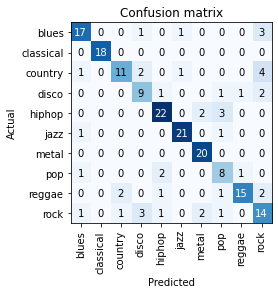

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
path=Path('/content/drive/My Drive/Dataset GTZAN/Data/images_original/')

In [ ]:
modelnew=load_learner(path)

In [ ]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time
0,0.320558,0.898324,0.773869,01:11
1,0.351137,1.075631,0.723618,01:12
2,0.410577,1.977302,0.663317,01:14
3,0.524689,3.440201,0.522613,01:12
4,0.583059,1.570629,0.728643,01:12
5,0.527708,1.163773,0.733668,01:12
6,0.445813,0.912681,0.758794,01:11
7,0.388266,0.844168,0.798995,01:12
8,0.326888,0.873159,0.783920,01:11
9,0.277538,0.870574,0.778894,01:12


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
